## Importing packages

In [13]:
import pandas as pd
import re
import datetime as dt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from plotnine import *
# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [14]:
data = pd.read_csv("Raw Data/top_toilets.csv",index_col=0)
top_toilets = data

## Exploring geo-distance for sanity check

In [15]:
# Fake user data
user_coordinates=[52.52646152725616, 13.376623742933933]
lat1 = np.radians(52.52646152725616)
lon1 = np.radians(13.376623742933933)

In [16]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0
data['lat2'] = np.radians(data['Latitude'])
data['lon2'] = np.radians(data['Longitude'])

data['dlon'] = data['lon2'] - lon1
data['dlat'] = data['lat2'] - lat1

data['a'] = np.sin(data['dlat'] / 2)**2 + cos(lat1) * np.cos(data['lat2']) * np.sin(data['dlon'] / 2)**2
data['c'] = 2 * np.arctan2(np.sqrt(data['a'] ), np.sqrt(1 - data['a'] ))

data['geo_distance'] = R * data['c']

data['geo_distance']

227    14.469973
147    18.498717
234     6.951808
237    13.899547
221     4.127679
         ...    
399    20.273074
425    16.643116
300     9.076911
416    12.323595
390    10.868235
Name: geo_distance, Length: 455, dtype: float64

In [17]:
data['geo_distance'].nsmallest(5)

154    0.296527
454    0.558531
443    1.019355
158    1.124653
291    1.140087
Name: geo_distance, dtype: float64

# Exploring clustering with kmeans

#### Distortion is the average of the euclidean squared distance from the centroid of the respective clusters. Inertia is the sum of squared distances of samples to their closest cluster centre.

In [18]:
## We try different methods to find the best combination of k and clusters

In [31]:
# Using silhoette score to estimate the best k and number of clusters

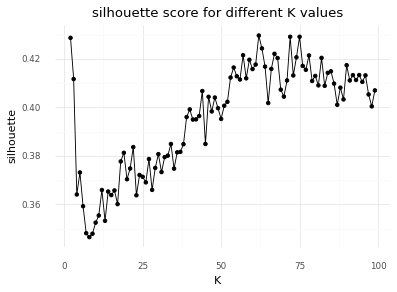

<ggplot: (136870724858)>

In [21]:
coords = top_toilets[['Latitude','Longitude']]

distortions = []
sil = []
K = range(2,100)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)
    labels = kmeansModel.labels_
    sil.append(silhouette_score(coords, labels,metric = 'euclidean'))

sse_df =pd.DataFrame({"K":K,
                      'sse':distortions,
                      'silhouette':sil})
(ggplot(sse_df, aes(x='K', y='silhouette'))+geom_point()+geom_line()+theme_minimal()+labs(title='silhouette score for different K values'))


In [ ]:
# elbow method 
#The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) 
#and then for each value of k computes an average score for all clusters. By default, the distortion 
#score is computed, the sum of square distances from each point to its assigned center.

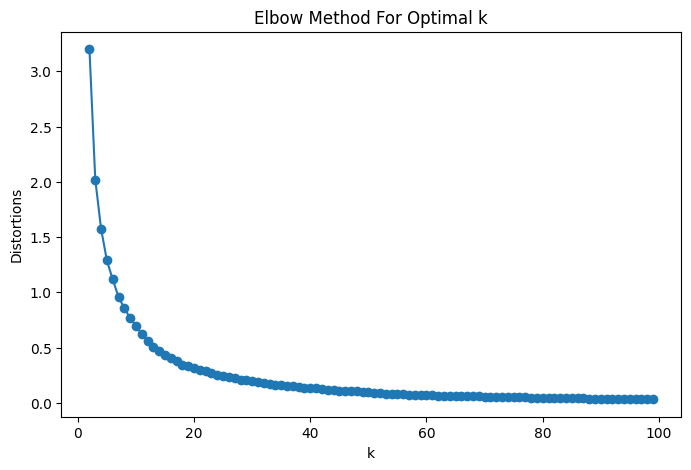

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.savefig('elbow.png')
plt.show()

In [23]:
# Using the elbow method we are not getting the best results

In [34]:
# We understood from the higher Silhoutte scores that, the number of clusters would be optimum in and around 75.

In [33]:
kmeans = KMeans(n_clusters=75, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k = 75", " silhouette_score ", silhouette_score(coords, y, metric='euclidean'))

k = 75  silhouette_score  0.4047709808899906


In [29]:
top_toilets['cluster'] = kmeans.predict(top_toilets[['Latitude','Longitude']])
top_toilets.head()

,LavatoryID,Description,City,Street,opening_hours,street_address,PostalCode,Country,Longitude,Latitude,...,ratings,Comments,lat2,lon2,dlon,dlat,a,c,geo_distance,cluster
227,Wall_123495,"Wall CT, Barnetstr.",Berlin,Barnetstr. ggü. 54 (0-24 Uhr),0:00-24:00,Barnetstr. ggü. 54,12305,Deutschland,13.396125,52.396915,...,30,NaN,0.914499,0.233806,0.000340,-0.002261,1.288806e-06,0.002271,14.469973,14
147,Wall_122524,"Wall CT, S-Bhf. Friedrichshagen, Dahlwitzer La...",Berlin,"S-Bhf. Friedrichshagen, Dahlwitzer Landstr. ...",0:00-24:00,"S-Bhf. Friedrichshagen, Dahlwitzer Landstr.",12587,Deutschland,13.625350,52.457726,...,30,NaN,0.915560,0.237807,0.004341,-0.001200,2.106372e-06,0.002903,18.498717,35
234,Wall_123502,"Wall CT, Bosepark, Manteuffelstr.",Berlin,"Bosepark, Manteuffelstr. ggü. 9 (0-24 Uhr)",0:00-24:00,"Bosepark, Manteuffelstr. ggü. 9",12103,Deutschland,13.377623,52.463965,...,30,NaN,0.915669,0.233484,0.000017,-0.001091,2.974730e-07,0.001091,6.951808,54
237,Wall_123562,"Wall CT, Alt-Gatow",Berlin,Alt-Gatow hinter 65 (0-24 Uhr),0:00-24:00,Alt-Gatow hinter 65,14089,Deutschland,13.183582,52.483931,...,30,NaN,0.916017,0.230097,-0.003369,-0.000742,1.189196e-06,0.002181,13.899547,31
221,Wall_123484,"Wall CT, Viktoriapark, Kreuzbergstr.",Berlin,"Viktoriapark, Kreuzbergstr. ggü. 31 (0-24 Uhr)",0:00-24:00,"Viktoriapark, Kreuzbergstr. ggü. 31",10965,Deutschland,13.377600,52.489357,...,30,NaN,0.916112,0.233483,0.000017,-0.000648,1.048731e-07,0.000648,4.127679,5


In [30]:
import plotly_express as px
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
#configure_plotly_browser_state()
px.scatter_mapbox(data, lat="Latitude", lon="Longitude",color="cluster",size_max=30, zoom=3, width=800, height=400)

ModuleNotFoundError: No module named 'plotly_express'

In [218]:
recommend_toilets(top_toilets,52.52646152725616, 13.376623742933933)

26


,LavatoryID,Latitude,Longitude,geo_distance,cluster,ratings
157,Wall_122531,52.528958,13.378163,0.296527,26,22
225,Wall_123487,52.502596,13.377878,2.655921,26,22
360,Fremd_1,52.513760,13.380450,1.436327,26,22
21,Wall_119993,52.514167,13.391500,1.698216,26,19
161,Wall_122575,52.516372,13.375539,1.124653,26,18


In [219]:
near_toilets = data.sort_values(by=['geo_distance'], ascending=True)
near_toilets.iloc[0:5][['LavatoryID', 'Latitude','Longitude','geo_distance','cluster','ratings']]

,LavatoryID,Latitude,Longitude,geo_distance,cluster,ratings
157,Wall_122531,52.528958,13.378163,0.296527,26,22
161,Wall_122575,52.516372,13.375539,1.124653,26,18
294,Wall_3389,52.516609,13.381269,1.140087,26,17
271,Wall_124364,52.537157,13.365744,1.399000,88,14
360,Fremd_1,52.513760,13.380450,1.436327,26,22
